In [ ]:
import pandas as pd
import numpy as np
from fontTools.misc.plistlib import end_data
%matplotlib inline
import matplotlib.pyplot as plt
import load_data as ld

dir_data = "C:\\Users\\nicol\\Data\\data.gouv.fr\\"

# Véhicules immatriculés impliqués dans les accidents corporels - 2009 à 2021
vehic_immat = ld.load_vehic_immat(folder_path=dir_data, start_year=2009, end_year=2021)

# Caractéristiques
caract = ld.load_caract(folder_path=dir_data, start_year=2005, end_year=2021)

# Lieux
lieux = ld.load_lieux(folder_path=dir_data, start_year=2005, end_year=2021)

# Usagers
usagers = ld.load_usagers(folder_path=dir_data, start_year=2005, end_year=2021)

# Véhicules
vehic = ld.load_vehicules(folder_path=dir_data, start_year=2005, end_year=2021)


In [ ]:
# Etude des fichiers usagers-yyyy.csv

# 1 : Indemne
# 2 : Tué
# 3 : Blessé hospitalisé
# 4 : Blessé léger

print("Usagers - Dimension des données selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {usagers[year].shape}")

print("\nUsagers - Variables selon les années : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {list(usagers[year].columns)}")

print("\nUsagers - Modalités de la variable grav : \n")
for year in range(2018, 2022):
    print(f"usagers {year} : {usagers[year]['grav'].value_counts()}")


plt.figure(figsize=(16, 16))
plt.title('Répartition de la gravité des accidents par année depuis 2005')
for k in range(1, 18):
    year = 2005 + k -1
    plt.subplot(5, 4, k)
    plt.hist(usagers[year].grav);
    plt.title(year)

## Analyse usagers

Help on function load_usagers in module load_data:

load_usagers(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : usagers = load_usagers(2019, 2021)
    les données de l'années 2020 sont accesibles usagers[2020]
    
    Num_Acc : identifiant de l'accident
    id_vehicule : identifiant unique du véhicule repris pour chacun des usagers occupant ce véhicule
    num_veh : identifiant du véhicule repris pour chacun des usagers occupant ce véhicule
    place : permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident
    catu : catégorie d'usager
    grav : gravité de l'accident (!!!VARIABLE CIBLE!!!)
    sexe : sexe de l'usager
    an_nais : année de naissance de l'usager
    trajet : motif du déplacement au moment de l’accident
    secu1 : le renseignement du caractère indique la présence et l’utilisation de l’équipement de sécurité
    secu2 : le renseignemen

C:\Users\nicol\AppData\Local\Temp\ipykernel_23632\1477570674.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'locp', 'actp', 'etatp']].hist(ax = ax);


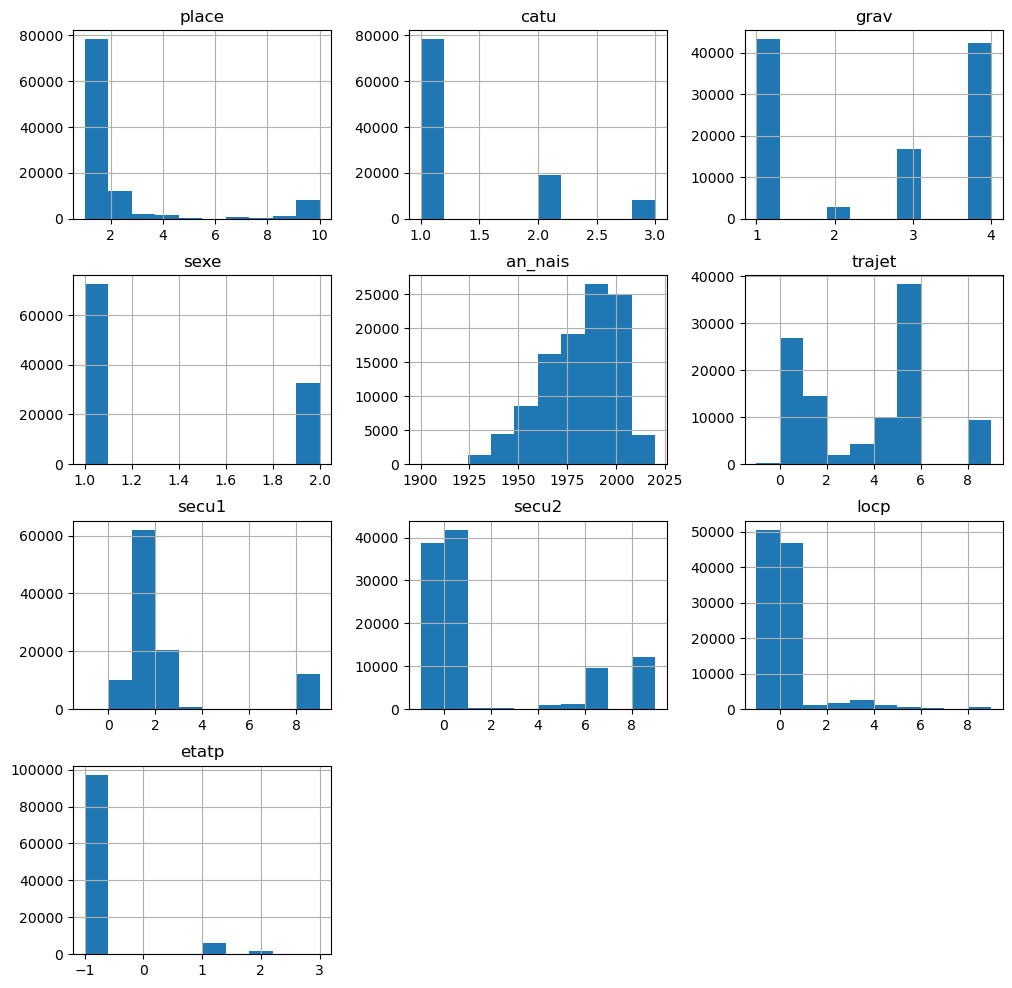

In [91]:
# Analyse rapide des colonnes du fichier usager

help(ld.load_usagers)

df = usagers[2020]
print(list(df.columns))

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'locp', 'actp', 'etatp']].hist(ax = ax);
# conducteur très majoritairement impliqué
# ~70% d'hommes vs ~30% femmes
# pic de jeunes conducteurs
# pics sur promenade et trajets domicile-travail

## Analyse caracteristiques

In [ ]:
# Analyse rapide des colonnes du fichier caractéristiques

help(ld.load_caract)

df = caract[2020]
print(list(df.columns))

df.head()
# cols = ['mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col', 'lat', 'long']
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['mois', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col']].hist(ax = ax);


## Analyse vehicules

In [ ]:
# Analyse rapide des colonnes du fichier vehicules

help(ld.load_vehicules)

df = vehic[2020]
print(list(df.columns))

df.head()
# cols = ['mois', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col', 'lat', 'long']
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc']].hist(ax = ax);


## Analyse lieux

In [ ]:
# Analyse rapide des colonnes du fichier vehicules

help(ld.load_lieux)

df = lieux[2020]
print(list(df.columns))

df.head()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'vma']].hist(ax = ax);


## Analyse véhicules immat impliqués

Help on function load_vehic_immat in module load_data:

load_vehic_immat(folder_path, start_year, end_year)
    Retourne les données dans un dictionnaire de dataframes dont la clé est l'année au format entier
    
    ex : vehic = load_vehicles(2019, 2021)
    les données de l'années 2020 sont accessibles vehic[2020]
    
    Id_accident : Numéro d'identifiant de l’accident
    Lettre Conventionnelle Véhicule : Identifiant de chaque véhicule impliqué dans un même accident – Code alpha
    Année : Année de l'accident
    Lieu Admin Actuel - Territoire Nom : 'Métropole', 'DOM', ou 'Autres OM'
    Type Accident - Libellé (old) : accident léger, mortel, ou grave
    CNIT : numéro d’identification national associé à chaque type, variante et version (TVV) de chaque réception communautaire de véhicules
    Catégorie véhicule : Cyclo, Moto légère, moto lourdez, VT, VU, PL, Autres
    Age véhicule : Age du véhicule à partir de la date de 1ère mise en circulation jusqu’à la date de l’accident

[

C:\Users\nicol\AppData\Local\Temp\ipykernel_23632\1436211329.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']].hist(ax = ax);


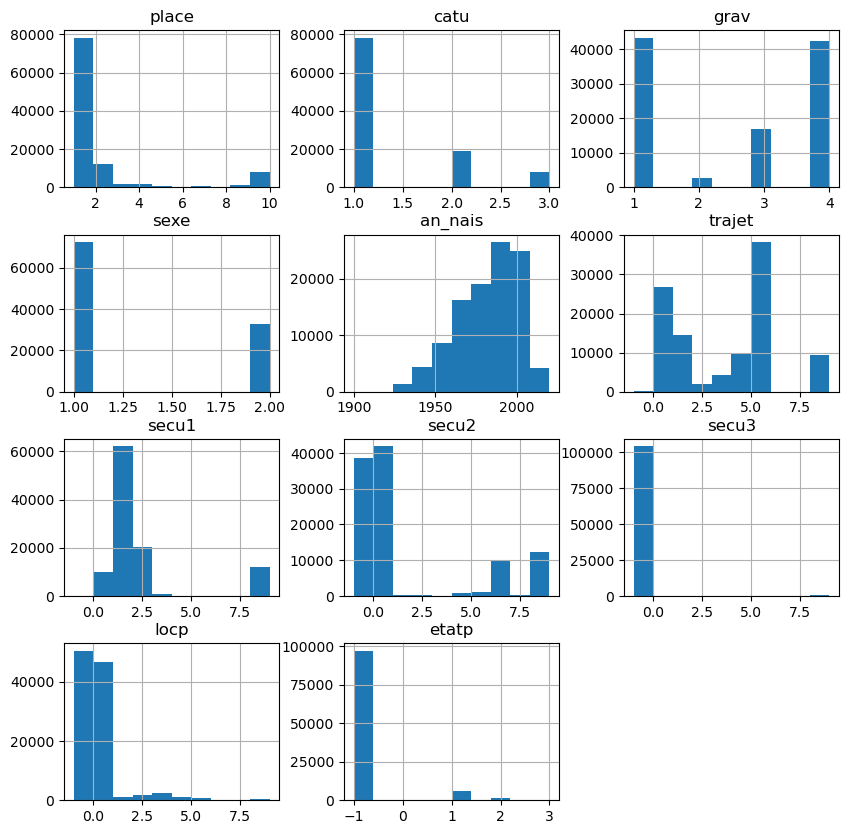

In [90]:
# Analyse rapide des colonnes du fichier dés véhicules immatriculés impliqués

help(ld.load_vehic_immat)

df = vehic_immat[2020]
print(list(df.columns))

df.head()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
df[['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp']].hist(ax = ax);
